In [1]:
import numpy as np
import scipy.optimize
import scipy.special
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Adjacency Matrices

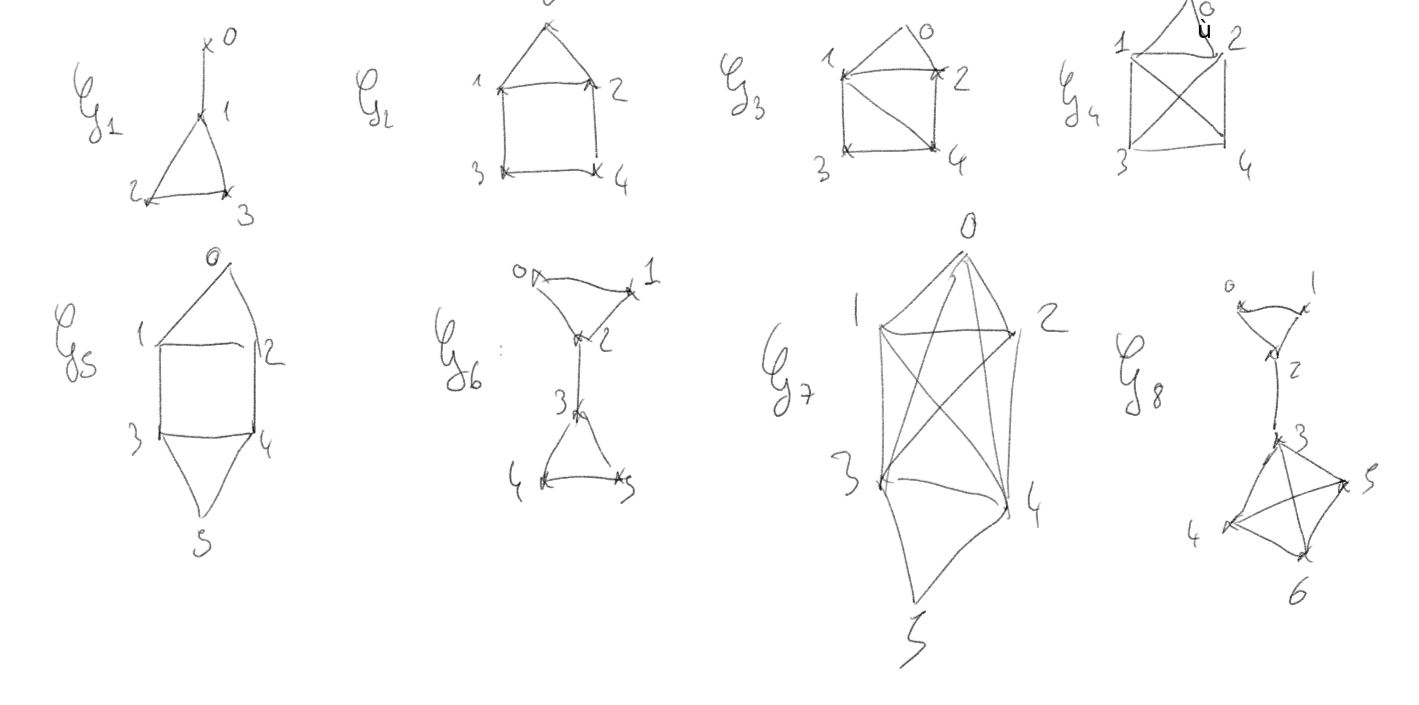

C:\Users\romai\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


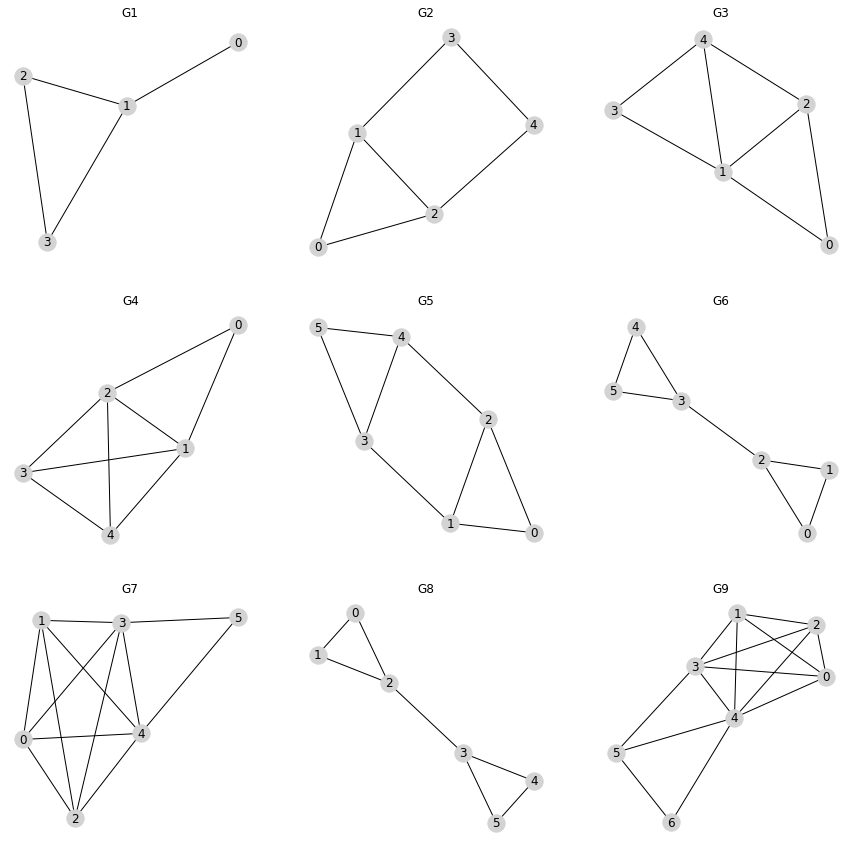

In [2]:
# Stop sign graph
G1 = nx.Graph(incoming_graph_data=[
    (0,1),
    (1,2), (1,3),
    (2,3)
])


# House graph
G2 = nx.Graph(incoming_graph_data=np.array([
 [0,1,1,0,0],
 [1,0,1,1,0],
 [1,1,0,0,1],
 [0,1,0,0,1],
 [0,0,1,1,0]
]))

# Full-House graph
G3 = nx.Graph(incoming_graph_data=[
    (0,1), (0,2),
    (1,2), (1,3),(1,4),
    (2,4), 
    (3,4)
])

# Full-House graph
G4 = nx.Graph(incoming_graph_data=[
    (0,1), (0,2),
    (1,2), (1,3),(1,4),
    (2,4), (2,3),
    (3,4)
])

#
G5 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),(1,3),
    (2,4),
    (3,4),(3,5),
    (4,5)
])

#
G6 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),
    (2,3),
    (3,4),(3,5),
    (4,5)
])

#
G7 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),(0,3),(0,4),
    (1,2),(1,3),(1,4),
    (2,3),(2,4),
    (3,4),(3,5),
    (4,5)
])

#
G8 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),
    (2,3),
    (3,4),(3,5),
    (4,5)
])

#
G9 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),(0,3),(0,4),
    (1,2),(1,3),(1,4),
    (2,3),(2,4),
    (3,4),(3,5),
    (4,5),(4,6),
    (5,6)
])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
ax = axes.flatten()
graphs = [G1,G2,G3,G4,G5,G6,G7,G8,G9]


for i in range(9):
    nx.draw_networkx(graphs[i], node_color = "lightgray", ax=ax[i])
    ax[i].set_axis_off()
    ax[i].title.set_text("G"+str(i+1))

plt.show()

In [3]:
def spanning_trees(G):
    #print(edges)
    m = G.size()
    n = G.number_of_nodes()
    edges = list(G.edges)
    edge_index_candidates = list(itertools.combinations(range(m),n-1))
    st = []
    for c in edge_index_candidates:
        S = G.edge_subgraph([edges[i] for i in c])
        if nx.is_connected(S):
            if S.number_of_nodes() ==n:
                st.append(S)
    return st

def spanning_tree_constraints(G):
    #Returns the matrix with one line per st
    #With -1 on the first column
    #And 0/1 on next columns whether edge belongs to tree
    st = spanning_trees(G)
    T = len(st)
    m = G.size()
    edges = list(G.edges)
    constraints = np.zeros(shape=(T,m+1))
    constraints[:,0]=-1
    for i, S in enumerate(st):
        for j, e in enumerate(edges):
            if edges[j] in S.edges:
                constraints[i,j+1]=1
    return constraints

def max_min_st(G):
    constraints = spanning_tree_constraints(G)
    T = len(constraints)
    n = G.number_of_nodes()
    m = G.size()
    
    c = np.zeros(m+1)
    c[0] = 1
    
    A_ub = np.zeros(shape=(m+T,m+1))
    for i in range(m):
        A_ub[i,i+1] = -1
    A_ub[m:,:] = constraints
    
    b_ub = np.zeros(shape=(m+T))
    
    A_eq = np.zeros(shape=(1,m+1))
    A_eq[:,1:]=1
    
    b_eq = np.array([1])
    return c, A_ub, b_ub, A_eq, b_eq 


In [4]:
G = G9

c, A_ub, b_ub, A_eq, b_eq = max_min_st(G)
solution = scipy.optimize.linprog(c,A_ub,b_ub,A_eq,b_eq,method="simplex")#,method='interior-point') ==> Really strange, the interior point method does not seem to work
print("weights", solution["x"][1:])

weights [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]


In [5]:
weights = [scipy.optimize.linprog(*max_min_st(G),method="simplex")["x"][1:] for G in graphs]

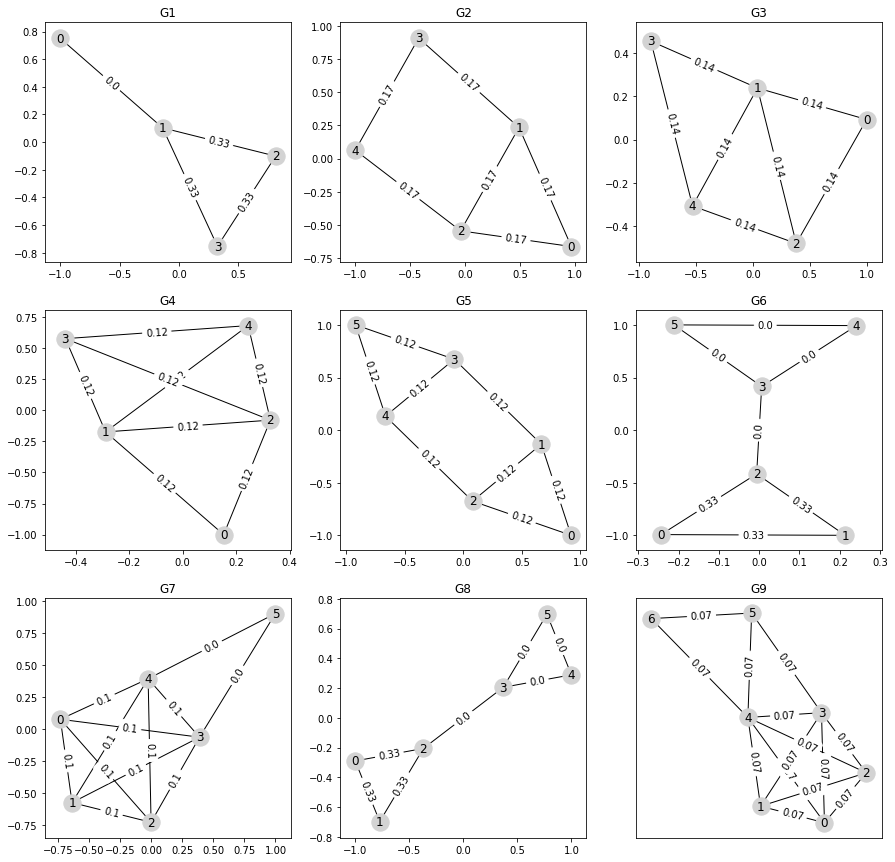

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
ax = axes.flatten()
graphs = [G1,G2,G3,G4,G5,G6,G7,G8,G9]


for i in range(9):
    pos = nx.spring_layout(graphs[i])
    nx.draw_networkx(graphs[i],pos = pos, node_color = "lightgray", ax=ax[i])
    labels = {list(graphs[i].edges)[j]: np.round(weights[i][j], decimals = 2) for j in range(graphs[i].size())}
    nx.draw_networkx_edge_labels(graphs[i],pos,edge_labels=labels, ax=ax[i])
    ax[i].title.set_text("G"+str(i+1))

plt.show()